In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset

df = pd.read_csv('Flipkart_Dataset.csv')
df.head()

,Product_name,Price,Rating,Review,Summary
0,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",5,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",5,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler-(White, Teal, ...","₹10,499.00",4,Nice product,A Good cooler by Crompton. The height of the c...


In [3]:
# dropping the unwanted columns

df = df[['Product_name', 'Rating', 'Review', 'Summary']]
df.head()

,Product_name,Rating,Review,Summary
0,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",5,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",5,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",4,Nice product,A Good cooler by Crompton. The height of the c...


In [4]:
# checking the shape

df.shape

(20801, 4)

In [5]:
# checking for duplicates

df.duplicated().sum()

1774

In [6]:
# dropping the duplicates

df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Product_name,Rating,Review,Summary
0,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",5,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",5,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler-(White, Teal, ...",4,Nice product,A Good cooler by Crompton. The height of the c...


In [7]:
# checking for null values

df.isnull().sum()

Product_name    0
Rating          0
Review          0
Summary         0
dtype: int64

# Analysing the Product column

In [8]:
df['Product_name'] = df['Product_name'].str.split().str[0]
df.head()

,Product_name,Rating,Review,Summary
0,Crompton,5,Simply awesome,it's really worth every single penny. it works...
1,Crompton,4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,Crompton,5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,Crompton,5,Fabulous!,Delivery was delayed by two days except this e...
4,Crompton,4,Nice product,A Good cooler by Crompton. The height of the c...


In [9]:
df['Product_name'].value_counts()

Product_name
Crompton      9675
Hindware      2904
Cosito        1877
Symphony      1364
FLIPZON       1181
METRO          372
S              297
Simple         290
Goodrik        284
CLOTHOLOGY     107
aniket         106
Zofiy          100
Furnifry        99
Bhimada         98
colcum          98
POOWEREST       52
Growing         42
Yogini          37
BAJAJ           27
Candes          17
Name: count, dtype: int64

In [10]:
value = df['Product_name'].value_counts()
value = value[value>200]
df['Product_name'] = df['Product_name'].apply(lambda x: x if x in value else 'other')
df.head()

,Product_name,Rating,Review,Summary
0,Crompton,5,Simply awesome,it's really worth every single penny. it works...
1,Crompton,4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,Crompton,5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,Crompton,5,Fabulous!,Delivery was delayed by two days except this e...
4,Crompton,4,Nice product,A Good cooler by Crompton. The height of the c...


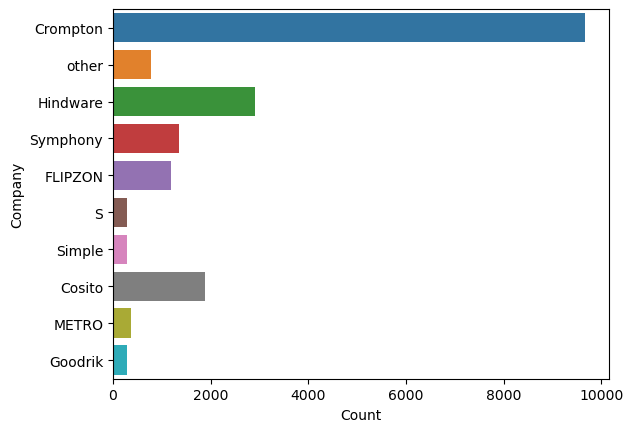

In [11]:
sns.countplot(data = df, y = 'Product_name')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

# Analysing the Rating column

In [12]:
df['Rating'].value_counts()

Rating
5    9139
4    4500
1    2438
3    1982
2     968
Name: count, dtype: int64

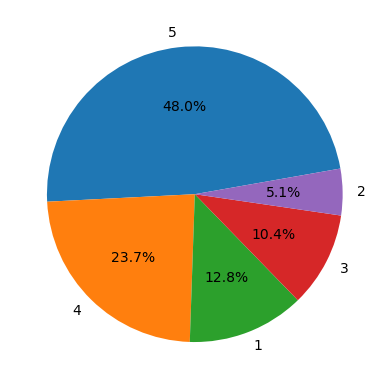

In [13]:
plt.pie(df['Rating'].value_counts(), labels = df['Rating'].value_counts().index, autopct = '%0.1f%%', startangle = 10)
plt.show()

In [14]:
df.head()

,Product_name,Rating,Review,Summary
0,Crompton,5,Simply awesome,it's really worth every single penny. it works...
1,Crompton,4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,Crompton,5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,Crompton,5,Fabulous!,Delivery was delayed by two days except this e...
4,Crompton,4,Nice product,A Good cooler by Crompton. The height of the c...


In [15]:
# creating a new column

df['text'] = df['Review']+ ' '+df['Summary']
df.head()

,Product_name,Rating,Review,Summary,text
0,Crompton,5,Simply awesome,it's really worth every single penny. it works...,Simply awesome it's really worth every single ...
1,Crompton,4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...,Worth the money . Desert Cooler live up to the...
2,Crompton,5,Worth every penny,GREAT packaging by seller. As this was the mos...,Worth every penny GREAT packaging by seller. A...
3,Crompton,5,Fabulous!,Delivery was delayed by two days except this e...,Fabulous! Delivery was delayed by two days exc...
4,Crompton,4,Nice product,A Good cooler by Crompton. The height of the c...,Nice product A Good cooler by Crompton. The he...


In [16]:
df = df[['text']]
df.head()

,text
0,Simply awesome it's really worth every single ...
1,Worth the money . Desert Cooler live up to the...
2,Worth every penny GREAT packaging by seller. A...
3,Fabulous! Delivery was delayed by two days exc...
4,Nice product A Good cooler by Crompton. The he...


In [17]:
# Function to clean the data

def clean(x):
    x = x.lower()
    x = re.sub('[^a-zA-Z]', ' ', x)
    return x
    
df['clean'] = df['text'].apply(clean)
df.head()

,text,clean
0,Simply awesome it's really worth every single ...,simply awesome it s really worth every single ...
1,Worth the money . Desert Cooler live up to the...,worth the money desert cooler live up to the...
2,Worth every penny GREAT packaging by seller. A...,worth every penny great packaging by seller a...
3,Fabulous! Delivery was delayed by two days exc...,fabulous delivery was delayed by two days exc...
4,Nice product A Good cooler by Crompton. The he...,nice product a good cooler by crompton the he...


# VADER Sentiment Analysis

In [18]:
# Using Vader Sentiment to find the Score

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [19]:
from tqdm import tqdm
tqdm.pandas()

def polarity(x):
    x = sentiment.polarity_scores(x)
    if x['compound']>0:
        return 'Positive'
    else:
        return 'Negative'

df['score'] = df['clean'].progress_apply(polarity)

100%|██████████████████████████████████████████████████████████████████████████| 19027/19027 [00:02<00:00, 6770.62it/s]


In [20]:
df.head()

,text,clean,score
0,Simply awesome it's really worth every single ...,simply awesome it s really worth every single ...,Positive
1,Worth the money . Desert Cooler live up to the...,worth the money desert cooler live up to the...,Positive
2,Worth every penny GREAT packaging by seller. A...,worth every penny great packaging by seller a...,Positive
3,Fabulous! Delivery was delayed by two days exc...,fabulous delivery was delayed by two days exc...,Positive
4,Nice product A Good cooler by Crompton. The he...,nice product a good cooler by crompton the he...,Positive


In [21]:
df['score'].value_counts()

score
Positive    15320
Negative     3707
Name: count, dtype: int64

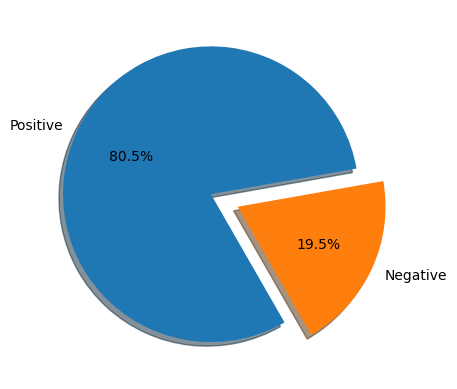

In [22]:
plt.pie(df['score'].value_counts(), labels = df['score'].value_counts().index, autopct = '%0.1f%%', 
        shadow = True, explode = [0,0.2], startangle = 10)
plt.show()

From the above pie chart we can see that, from the given data 80% of reviews are Positive and remanining 20% reviews are Negative